# Singular Value Decomposition in Inverse Problems

## Introduction

Singular Value Decomposition (SVD) is a mathematical technique that can be utilized to solve ill-posed linear problems of the form $\mathbf{d} = \mathbf{G}\mathbf{m}$, where the null space of G is non-trivial.

## The Inverse Problem Framework

In geophysical inverse problems, we typically have:
- **Forward model**: $\mathbf{d} = \mathbf{G}\mathbf{m}$
- **Data vector** $\mathbf{d}$: observed measurements (gravity, magnetic, seismic, etc.)
- **Model vector** $\mathbf{m}$: unknown subsurface parameters we want to determine
- **Green's function matrix** $\mathbf{G}$: relates model parameters to data

## When SVD is useful

### 1. **Ill-conditioned Systems**
Geophysical inverse problems are notoriously **ill-conditioned**, meaning:
- Small changes in data can lead to large changes in the model
- The system matrix $\mathbf{G}$ often has a very large condition number
- Direct inversion $\mathbf{m} = \mathbf{G}^{-1}\mathbf{d}$ is unstable or impossible

### 2. **Non-uniqueness**
Most geophysical problems are **non-unique** - multiple Earth models can produce the same observed data. SVD helps identify which aspects of the model are well-resolved by the data.

## How SVD Addresses These Challenges

### SVD Decomposition
For any matrix $\mathbf{G}$, SVD provides:
$$\mathbf{G} = \mathbf{U}\mathbf{S}\mathbf{V}^T$$

Where:
- $\mathbf{U}$: left singular vectors (data space)
- $\mathbf{S}$: diagonal matrix of singular values
- $\mathbf{V}$: right singular vectors (model space)

### Regularized Solution
For $p$ non-zero singular values, we define the reduced matrices:
- $\mathbf{U}_p$: first $p$ columns of $\mathbf{U}$ (size $m \times p$)
- $\mathbf{S}_p$: first $p \times p$ block of $\mathbf{S}$ (diagonal matrix)
- $\mathbf{V}_p$: first $p$ columns of $\mathbf{V}$ (size $n \times p$)

The SVD-based solution in matrix form is:
$$\mathbf{m} = \mathbf{V}_p \mathbf{S}_p^{-1} \mathbf{U}_p^T \mathbf{d}$$

Where $p$ is the effective rank determined by truncating small singular values.



## **Resolution Analysis**
- **Model Resolution Matrix**: $\mathbf{R}_m = \mathbf{V}\mathbf{V}^T$ shows which model parameters are resolved
- **Data Resolution Matrix**: $\mathbf{R}_d = \mathbf{U}\mathbf{U}^T$ shows which data are fit


## Challenges and Limitations

### **Computational Cost**
- SVD of large matrices can be expensive ($O(mn^2)$ for $m \times n$ matrix)
- May require iterative methods for very large problems

### **Choice of Truncation**
- Determining optimal number of singular values to retain
- Balance between resolution and stability
- Often requires a priori knowledge

### **Non-linear Problems**
- SVD directly applies to linear problems
- Non-linear problems require linearization and iteration



![SVD Visualization](SVD_visualisation.png)


SVD Results for T:
U_T shape: (37, 37)
s_T shape: (37,)
V^T_T shape: (37, 37)
Number of singular values: 37


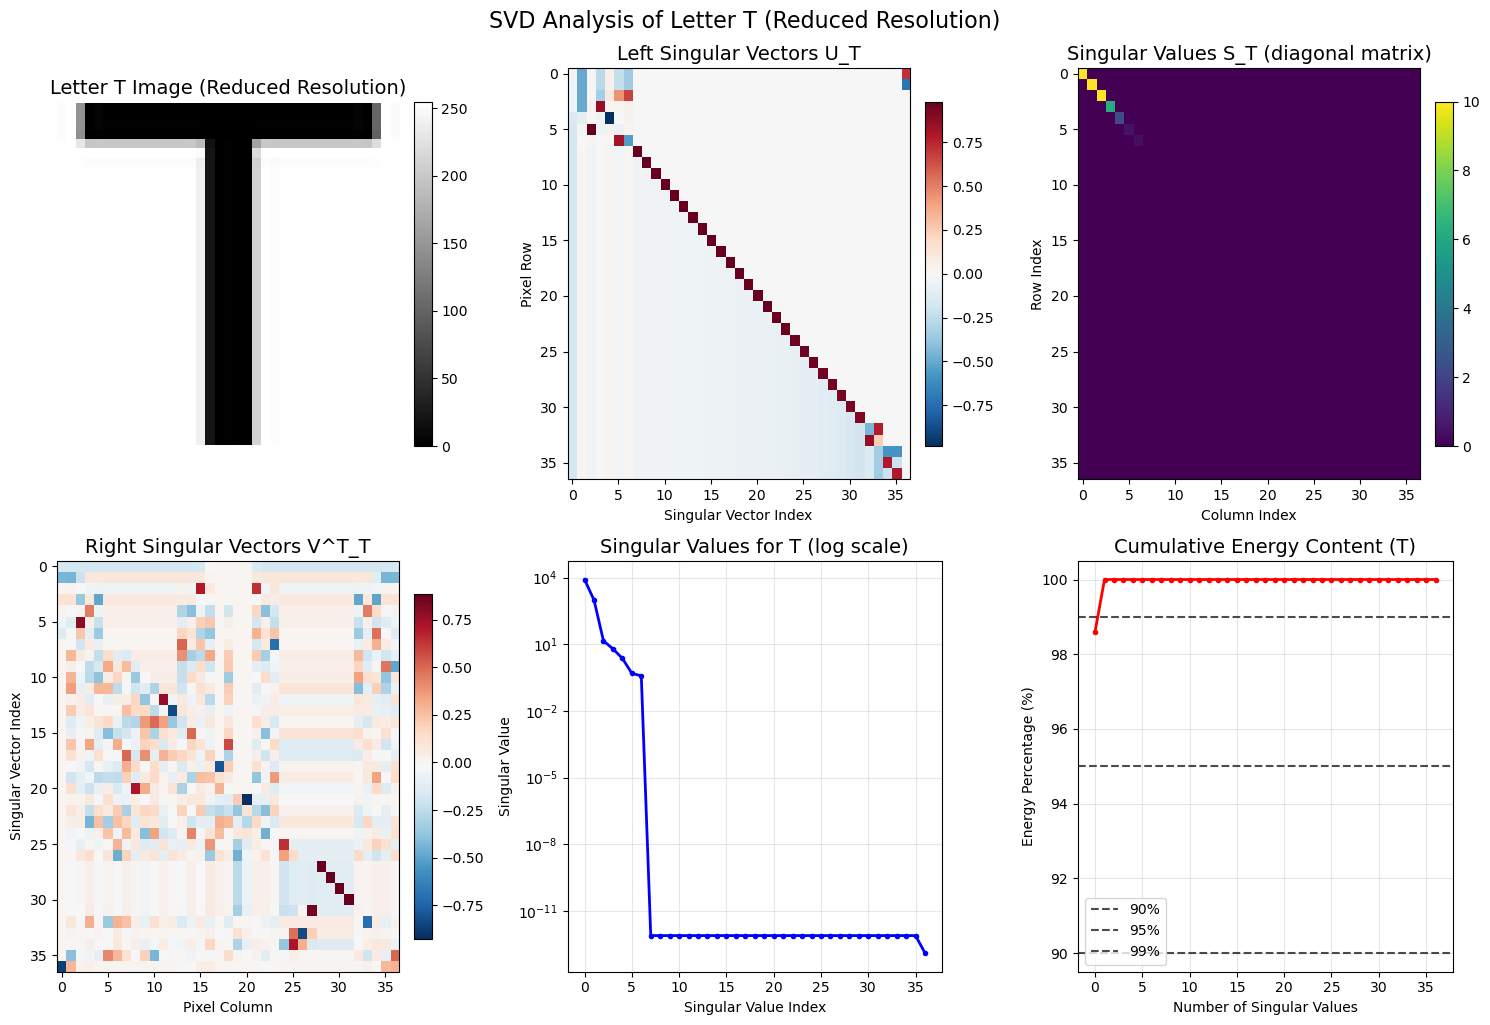


SVD Verification for T:
Reconstruction error (Frobenius norm): 7.63e-12

Energy Analysis for T:
Number of singular values for 90% energy: 1 (out of 37)
Number of singular values for 95% energy: 1 (out of 37)
Number of singular values for 99% energy: 2 (out of 37)
Rank of T matrix (non-zero singular values): 7

First 5 singular values: [8.19684002e+03 9.75487376e+02 1.42400042e+01 6.19944186e+00
 2.32221848e+00]
Ratio of largest to smallest non-zero singular value: 2.16e+04


In [6]:
## Illustrate SVD on letter T image with reduced resolution
# Load letter_T.png and reduce resolution significantly

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from PIL import Image

img_T = Image.open('letter_T.png').convert('L')
# Get original size
original_size = img_T.size

# Reduce resolution by factor of 4-6 (depending on original size)
reduction_factor = 6
new_size = (original_size[0] // reduction_factor, original_size[1] // reduction_factor)
img_T_reduced = img_T.resize(new_size, Image.Resampling.LANCZOS)


# Convert to numpy array
G_T = np.array(img_T_reduced, dtype=float)
    

# Perform SVD on the T matrix
U_T, s_T, Vt_T = svd(G_T, full_matrices=False)

print(f"\nSVD Results for T:")
print(f"U_T shape: {U_T.shape}")
print(f"s_T shape: {s_T.shape}")
print(f"V^T_T shape: {Vt_T.shape}")
print(f"Number of singular values: {len(s_T)}")

# Create S matrix for visualization
S_T = np.diag(s_T)

# Create subplots to visualize the T image SVD
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot original T image
im1 = axes[0, 0].imshow(G_T, cmap='gray')
axes[0, 0].set_title('Letter T Image (Reduced Resolution)', fontsize=14)
axes[0, 0].axis('off')
plt.colorbar(im1, ax=axes[0, 0], fraction=0.046, pad=0.04)

# Plot U matrix (left singular vectors)
im2 = axes[0, 1].imshow(U_T, cmap='RdBu_r', aspect='auto')
axes[0, 1].set_title('Left Singular Vectors U_T', fontsize=14)
axes[0, 1].set_xlabel('Singular Vector Index')
axes[0, 1].set_ylabel('Pixel Row')
plt.colorbar(im2, ax=axes[0, 1], fraction=0.046, pad=0.04)

# Plot singular values as a diagonal matrix
im3 = axes[0, 2].imshow(S_T, cmap='viridis', aspect='auto', vmin=0, vmax=10)
axes[0, 2].set_title('Singular Values S_T (diagonal matrix)', fontsize=14)
axes[0, 2].set_xlabel('Column Index')
axes[0, 2].set_ylabel('Row Index')
plt.colorbar(im3, ax=axes[0, 2], fraction=0.046, pad=0.04)

# Plot V^T matrix (right singular vectors transposed)
im4 = axes[1, 0].imshow(Vt_T, cmap='RdBu_r', aspect='auto')
axes[1, 0].set_title('Right Singular Vectors V^T_T', fontsize=14)
axes[1, 0].set_xlabel('Pixel Column')
axes[1, 0].set_ylabel('Singular Vector Index')
plt.colorbar(im4, ax=axes[1, 0], fraction=0.046, pad=0.04)

# Plot singular values as a line plot
axes[1, 1].semilogy(s_T, 'b.-', linewidth=2, markersize=6)
axes[1, 1].set_title('Singular Values for T (log scale)', fontsize=14)
axes[1, 1].set_xlabel('Singular Value Index')
axes[1, 1].set_ylabel('Singular Value')
axes[1, 1].grid(True, alpha=0.3)

# Show cumulative energy content
cumulative_energy_T = np.cumsum(s_T**2) / np.sum(s_T**2) * 100
axes[1, 2].plot(cumulative_energy_T, 'r.-', linewidth=2, markersize=6)
axes[1, 2].set_title('Cumulative Energy Content (T)', fontsize=14)
axes[1, 2].set_xlabel('Number of Singular Values')
axes[1, 2].set_ylabel('Energy Percentage (%)')
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].axhline(y=90, color='k', linestyle='--', alpha=0.7, label='90%')
axes[1, 2].axhline(y=95, color='k', linestyle='--', alpha=0.7, label='95%')
axes[1, 2].axhline(y=99, color='k', linestyle='--', alpha=0.7, label='99%')
axes[1, 2].legend()

plt.tight_layout()
plt.suptitle('SVD Analysis of Letter T (Reduced Resolution)', fontsize=16, y=1.02)
plt.show()

# Verify the SVD decomposition
reconstruction_error_T = np.linalg.norm(G_T - U_T @ np.diag(s_T) @ Vt_T, 'fro')
print(f"\nSVD Verification for T:")
print(f"Reconstruction error (Frobenius norm): {reconstruction_error_T:.2e}")

# Find number of singular values needed for different energy levels
idx_90_T = np.where(cumulative_energy_T >= 90)[0][0] + 1 if len(np.where(cumulative_energy_T >= 90)[0]) > 0 else len(s_T)
idx_95_T = np.where(cumulative_energy_T >= 95)[0][0] + 1 if len(np.where(cumulative_energy_T >= 95)[0]) > 0 else len(s_T)
idx_99_T = np.where(cumulative_energy_T >= 99)[0][0] + 1 if len(np.where(cumulative_energy_T >= 99)[0]) > 0 else len(s_T)

print(f"\nEnergy Analysis for T:")
print(f"Number of singular values for 90% energy: {idx_90_T} (out of {len(s_T)})")
print(f"Number of singular values for 95% energy: {idx_95_T} (out of {len(s_T)})")
print(f"Number of singular values for 99% energy: {idx_99_T} (out of {len(s_T)})")
print(f"Rank of T matrix (non-zero singular values): {np.sum(s_T > 1e-10)}")

# Show how much of the image structure is captured by the first few singular values
print(f"\nFirst 5 singular values: {s_T[:5]}")
print(f"Ratio of largest to smallest non-zero singular value: {s_T[0]/s_T[np.sum(s_T > 1e-10)-1]:.2e}")

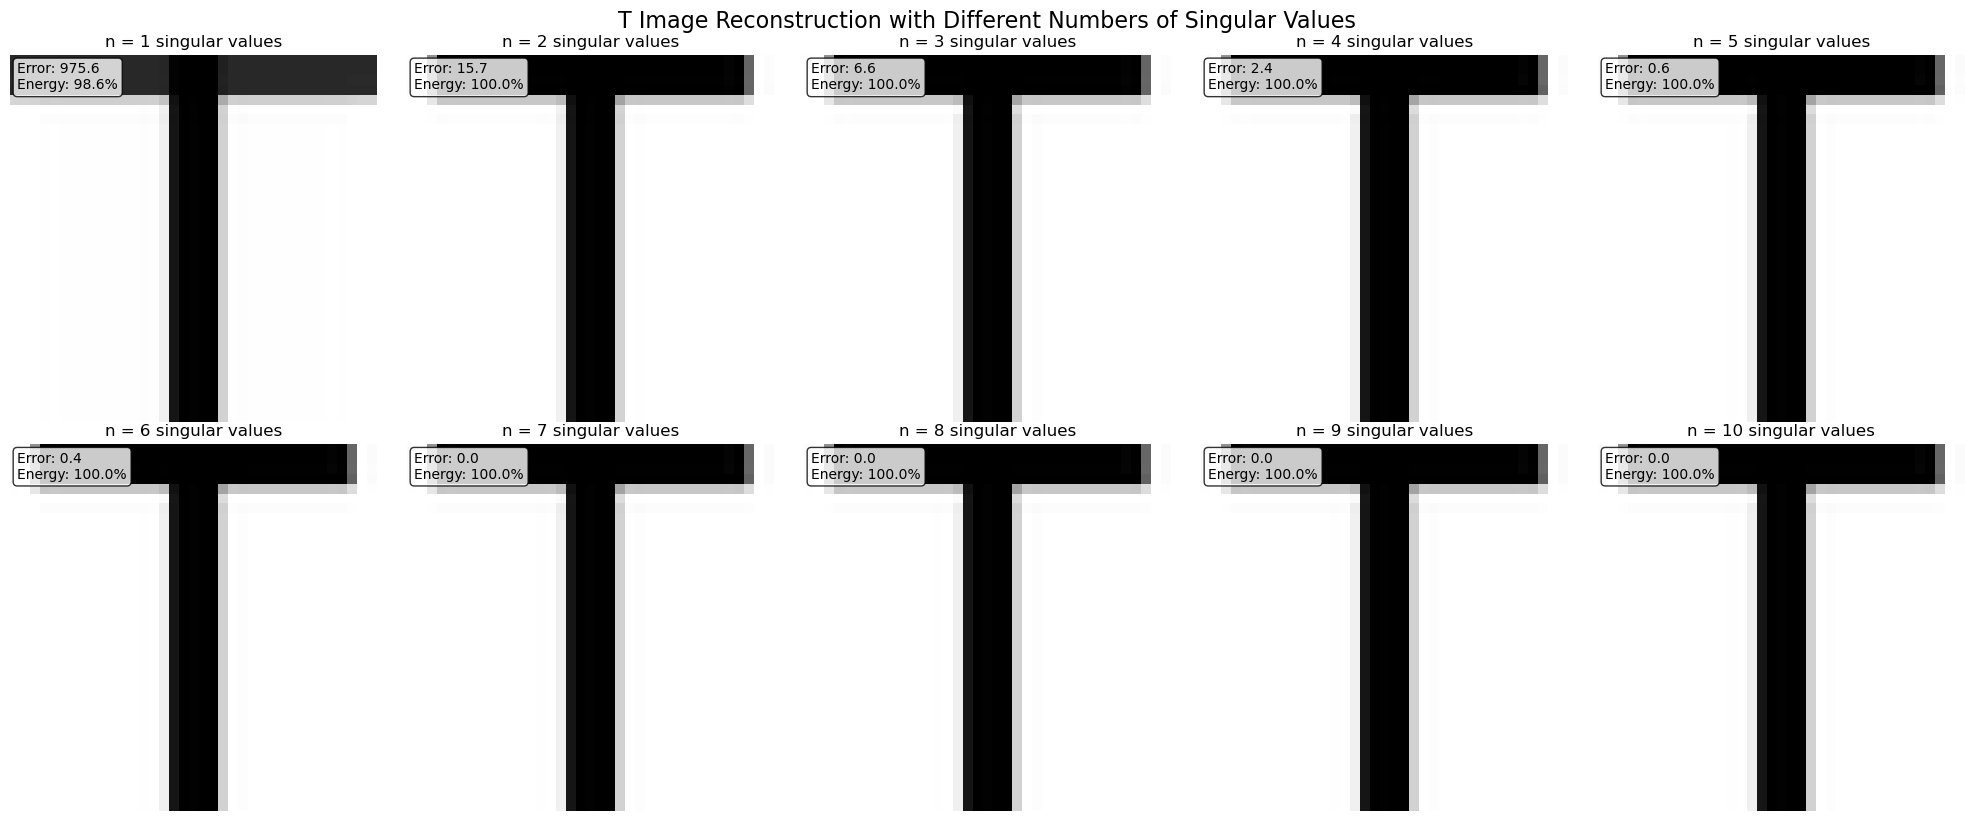

Reconstruction Analysis:
n   Frobenius Error Energy %   Compression Ratio
--------------------------------------------------
1   975.61          98.6       18.3           
2   15.72           100.0      9.1            
3   6.65            100.0      6.1            
4   2.40            100.0      4.6            
5   0.62            100.0      3.7            
6   0.38            100.0      3.0            
7   0.00            100.0      2.6            
8   0.00            100.0      2.3            
9   0.00            100.0      2.0            
10  0.00            100.0      1.8            

Key Observations:
- Original matrix size: (37, 37)
- Total singular values: 37
- Matrix rank (non-zero s.v.): 7
- First singular value: 8196.84
- 10th singular value: 0.00


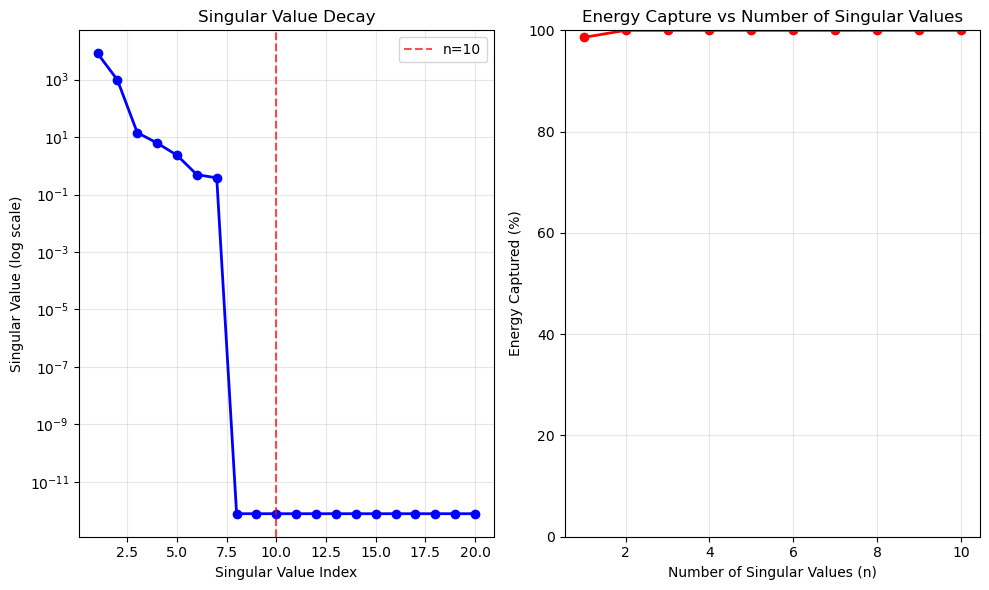

In [7]:
# Reconstruct the T image using different numbers of singular values
# Create reconstructions using the first n singular values for n = 1 to 10

n_reconstructions = 10
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for n in range(1, n_reconstructions + 1):
    # Reconstruct using first n singular values
    G_T_reconstructed = U_T[:, :n] @ np.diag(s_T[:n]) @ Vt_T[:n, :]
    
    # Plot the reconstruction
    im = axes[n-1].imshow(G_T_reconstructed, cmap='gray', vmin=0, vmax=255)
    axes[n-1].set_title(f'n = {n} singular values', fontsize=12)
    axes[n-1].axis('off')
    
    # Calculate and display reconstruction error
    error = np.linalg.norm(G_T - G_T_reconstructed, 'fro')
    energy_captured = np.sum(s_T[:n]**2) / np.sum(s_T**2) * 100
    
    # Add text with error and energy info
    axes[n-1].text(0.02, 0.98, f'Error: {error:.1f}\nEnergy: {energy_captured:.1f}%', 
                   transform=axes[n-1].transAxes, fontsize=10, 
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.suptitle('T Image Reconstruction with Different Numbers of Singular Values', fontsize=16, y=1.02)
plt.show()

# Print detailed analysis
print("Reconstruction Analysis:")
print("=" * 50)
print(f"{'n':<3} {'Frobenius Error':<15} {'Energy %':<10} {'Compression Ratio':<15}")
print("-" * 50)

for n in range(1, n_reconstructions + 1):
    G_T_reconstructed = U_T[:, :n] @ np.diag(s_T[:n]) @ Vt_T[:n, :]
    error = np.linalg.norm(G_T - G_T_reconstructed, 'fro')
    energy_captured = np.sum(s_T[:n]**2) / np.sum(s_T**2) * 100
    
    # Calculate storage savings
    original_elements = G_T.size
    compressed_elements = n * (U_T.shape[0] + Vt_T.shape[1] + 1)  # n*(rows + cols + 1 singular value)
    compression_ratio = original_elements / compressed_elements
    
    print(f"{n:<3} {error:<15.2f} {energy_captured:<10.1f} {compression_ratio:<15.1f}")

print("\nKey Observations:")
print(f"- Original matrix size: {G_T.shape}")
print(f"- Total singular values: {len(s_T)}")
print(f"- Matrix rank (non-zero s.v.): {np.sum(s_T > 1e-10)}")
print(f"- First singular value: {s_T[0]:.2f}")
print(f"- 10th singular value: {s_T[9]:.2f}" if len(s_T) >= 10 else f"- Last singular value: {s_T[-1]:.2f}")

# Show how the singular values decay
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.semilogy(range(1, min(21, len(s_T)+1)), s_T[:min(20, len(s_T))], 'bo-', linewidth=2, markersize=6)
plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='n=10')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value (log scale)')
plt.title('Singular Value Decay')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, n_reconstructions + 1), [np.sum(s_T[:n]**2) / np.sum(s_T**2) * 100 for n in range(1, n_reconstructions + 1)], 
         'ro-', linewidth=2, markersize=6)
plt.xlabel('Number of Singular Values (n)')
plt.ylabel('Energy Captured (%)')
plt.title('Energy Capture vs Number of Singular Values')
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

Original image size: (457, 427)
Reduced image size: (114, 106)
Image shape: (106, 114)
Image data type: float64
Pixel value range: [0.0, 255.0]

SVD Results:
U shape: (106, 106)
s shape: (106,)
V^T shape: (106, 114)
Number of singular values: 106
S matrix stats: min=1.00e-20, max=2.37e+04
NaN values in S: 0
Inf values in S: 0
Zero values in S: 0


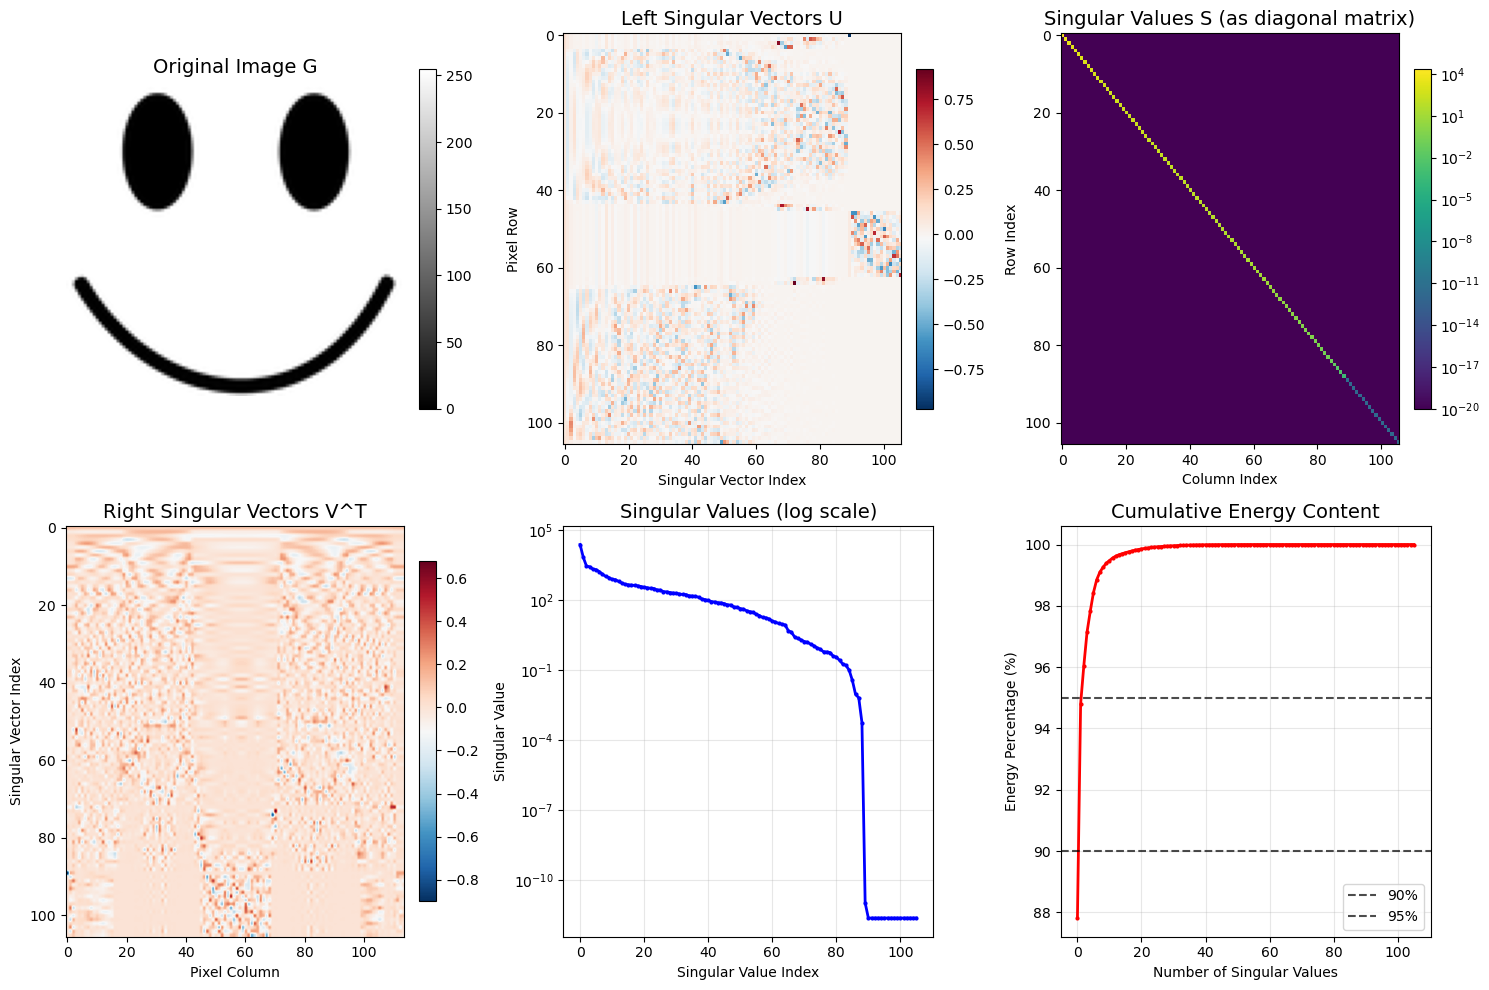


SVD Verification:
Reconstruction error (Frobenius norm): 2.15e-10
This should be close to machine precision (≈ 1e-14)

Energy Analysis:
Number of singular values for 90% energy: 2 (out of 106)
Number of singular values for 95% energy: 3 (out of 106)
Compression ratio (90%): 53.0:1
Compression ratio (95%): 35.3:1


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.linalg import svd
from PIL import Image

# Load the image and convert to grayscale
img = Image.open('smile.png').convert('L')
# Get original size
original_size = img.size
print(f"Original image size: {original_size}")

# Reduce resolution by factor of 4
reduction_factor = 4
new_size = (original_size[0] // reduction_factor, original_size[1] // reduction_factor)
img_reduced = img.resize(new_size, Image.Resampling.LANCZOS)
print(f"Reduced image size: {new_size}")

G = np.array(img_reduced, dtype=float)

print(f"Image shape: {G.shape}")
print(f"Image data type: {G.dtype}")
print(f"Pixel value range: [{G.min():.1f}, {G.max():.1f}]")

# Perform SVD
U, s, Vt = svd(G, full_matrices=False)

print(f"\nSVD Results:")
print(f"U shape: {U.shape}")
print(f"s shape: {s.shape}")
print(f"V^T shape: {Vt.shape}")
print(f"Number of singular values: {len(s)}")

# Create S matrix for visualization (showing only the diagonal)
S = np.diag(s)
# Replace zeros and very small values with a small positive value for log colorbar
S[S <= 1e-15] = 1e-20
# Check for and replace any NaN or inf values
S[~np.isfinite(S)] = 1e-20

print(f"S matrix stats: min={S.min():.2e}, max={S.max():.2e}")
print(f"NaN values in S: {np.isnan(S).sum()}")
print(f"Inf values in S: {np.isinf(S).sum()}")
print(f"Zero values in S: {(S == 0).sum()}")

# Create subplots to visualize G, U, S, and V^T
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot original image G
im1 = axes[0, 0].imshow(G, cmap='gray')
axes[0, 0].set_title('Original Image G', fontsize=14)
axes[0, 0].axis('off')
plt.colorbar(im1, ax=axes[0, 0], fraction=0.046, pad=0.04)

# Plot U matrix (left singular vectors)
im2 = axes[0, 1].imshow(U, cmap='RdBu_r', aspect='auto')
axes[0, 1].set_title('Left Singular Vectors U', fontsize=14)
axes[0, 1].set_xlabel('Singular Vector Index')
axes[0, 1].set_ylabel('Pixel Row')
plt.colorbar(im2, ax=axes[0, 1], fraction=0.046, pad=0.04)

# Plot singular values as a diagonal matrix S
im3 = axes[0, 2].imshow(S, cmap='viridis', aspect='auto', norm=LogNorm())
axes[0, 2].set_title('Singular Values S (as diagonal matrix)', fontsize=14)
axes[0, 2].set_xlabel('Column Index')
axes[0, 2].set_ylabel('Row Index')
plt.colorbar(im3, ax=axes[0, 2], fraction=0.046, pad=0.04)

# Plot V^T matrix (right singular vectors transposed)
im4 = axes[1, 0].imshow(Vt, cmap='RdBu_r', aspect='auto')
axes[1, 0].set_title('Right Singular Vectors V^T', fontsize=14)
axes[1, 0].set_xlabel('Pixel Column')
axes[1, 0].set_ylabel('Singular Vector Index')
plt.colorbar(im4, ax=axes[1, 0], fraction=0.046, pad=0.04)

# Plot singular values as a line plot
axes[1, 1].semilogy(s, 'b.-', linewidth=2, markersize=4)
axes[1, 1].set_title('Singular Values (log scale)', fontsize=14)
axes[1, 1].set_xlabel('Singular Value Index')
axes[1, 1].set_ylabel('Singular Value')
axes[1, 1].grid(True, alpha=0.3)

# Show cumulative energy content
cumulative_energy = np.cumsum(s**2) / np.sum(s**2) * 100
axes[1, 2].plot(cumulative_energy, 'r.-', linewidth=2, markersize=4)
axes[1, 2].set_title('Cumulative Energy Content', fontsize=14)
axes[1, 2].set_xlabel('Number of Singular Values')
axes[1, 2].set_ylabel('Energy Percentage (%)')
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].axhline(y=90, color='k', linestyle='--', alpha=0.7, label='90%')
axes[1, 2].axhline(y=95, color='k', linestyle='--', alpha=0.7, label='95%')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# Verify the SVD decomposition
reconstruction_error = np.linalg.norm(G - U @ np.diag(s) @ Vt, 'fro')
print(f"\nSVD Verification:")
print(f"Reconstruction error (Frobenius norm): {reconstruction_error:.2e}")
print(f"This should be close to machine precision (≈ 1e-14)")

# Find number of singular values needed for 90% and 95% energy
idx_90 = np.where(cumulative_energy >= 90)[0][0] + 1
idx_95 = np.where(cumulative_energy >= 95)[0][0] + 1
print(f"\nEnergy Analysis:")
print(f"Number of singular values for 90% energy: {idx_90} (out of {len(s)})")
print(f"Number of singular values for 95% energy: {idx_95} (out of {len(s)})")
print(f"Compression ratio (90%): {len(s)/idx_90:.1f}:1")
print(f"Compression ratio (95%): {len(s)/idx_95:.1f}:1")

Reconstructing with n values: [1, 2, 5, 10, 20, 50]


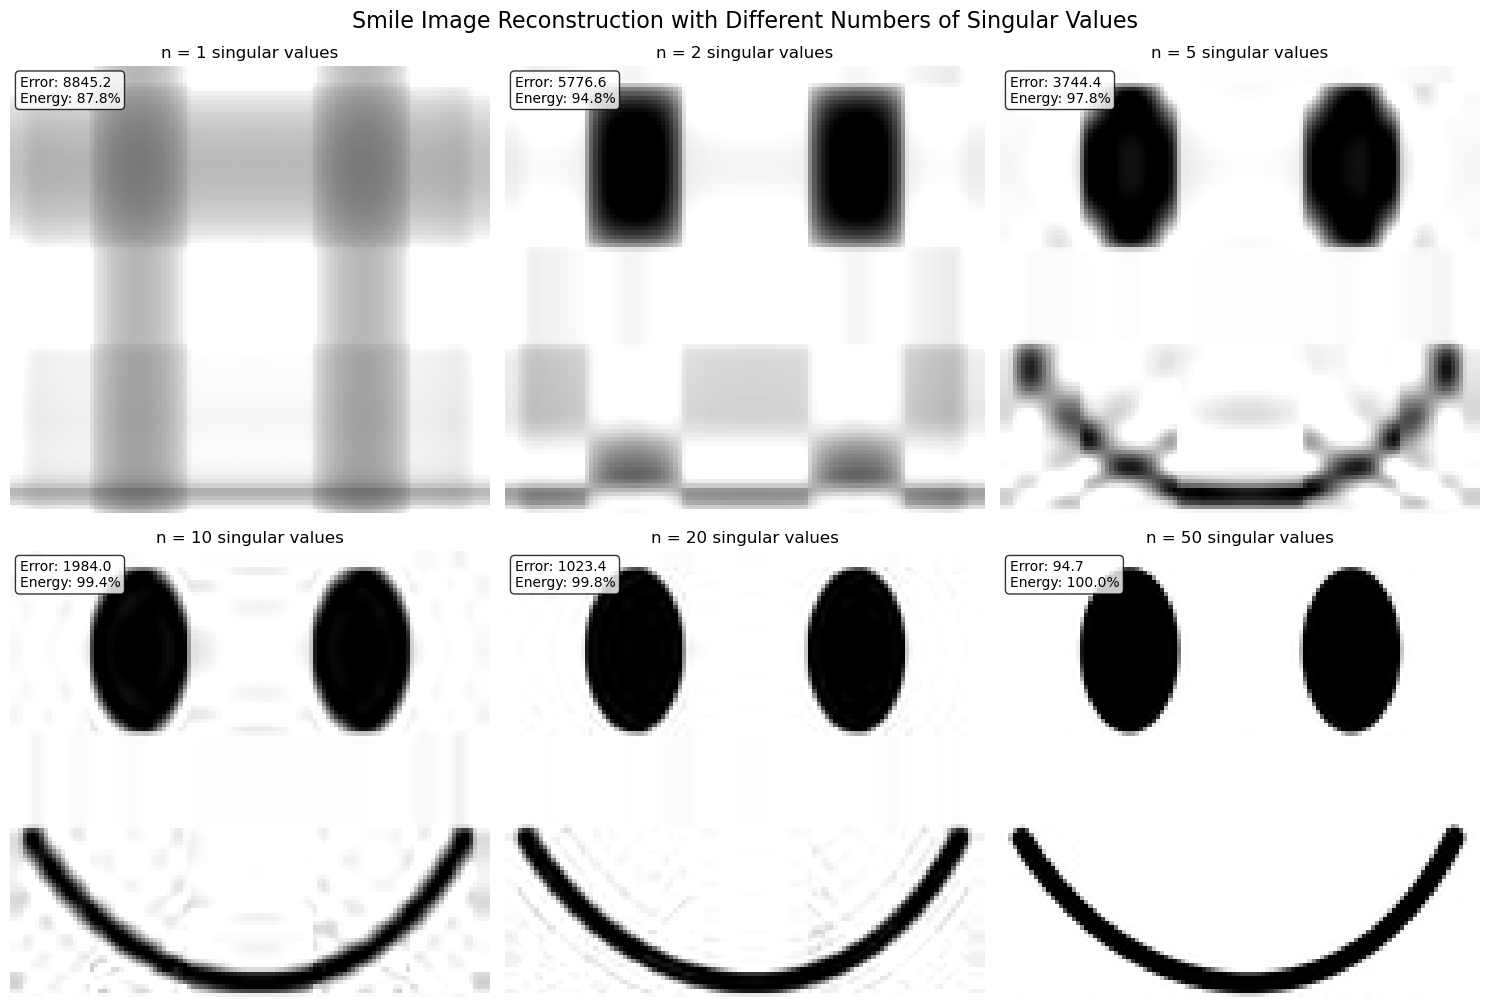


Detailed Reconstruction Analysis:
n    Frobenius Error Energy %   Compression Ratio PSNR (dB) 
----------------------------------------------------------------------
1    8845.24         87.8       54.7            10.0      
2    5776.65         94.8       27.3            13.7      
5    3744.42         97.8       10.9            17.5      
10   1983.99         99.4       5.5             23.0      
20   1023.42         99.8       2.7             28.8      
50   94.69           100.0      1.1             49.4      

Image Statistics:
- Original image size: (106, 114)
- Total singular values available: 106
- Matrix rank (non-zero s.v.): 89
- Dynamic range of singular values: 1.01e+16


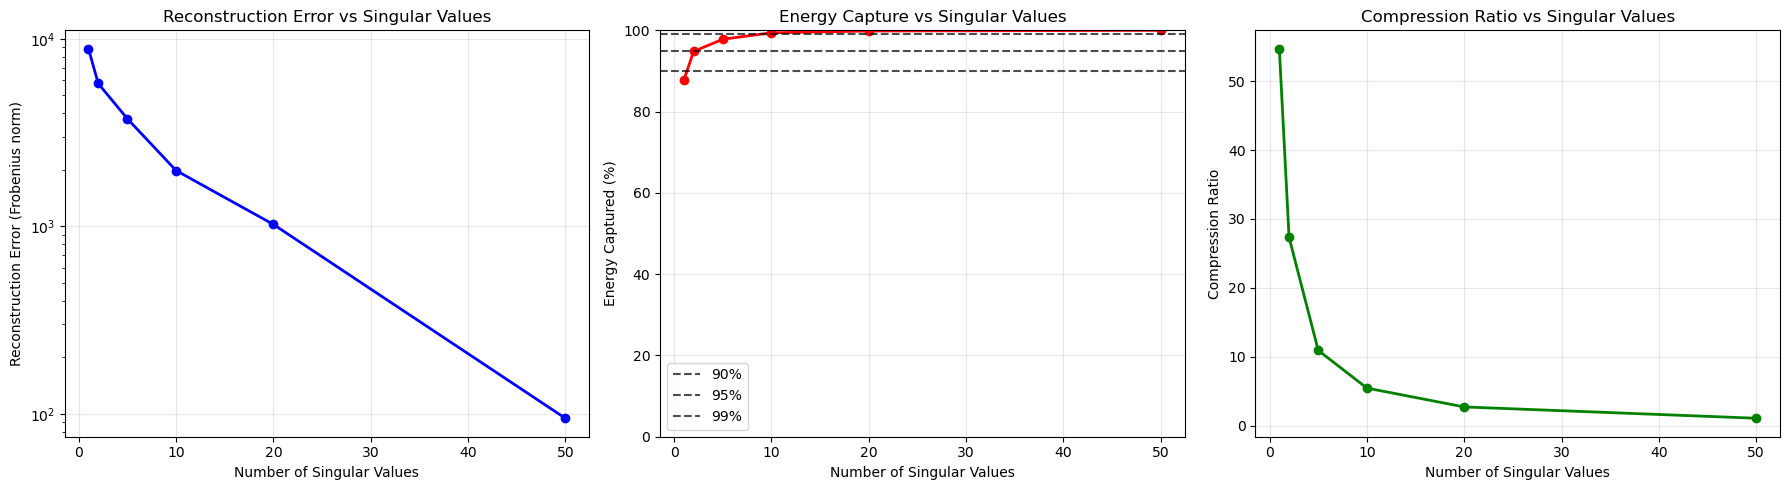

In [15]:
# Reconstruct the smile image using different numbers of singular values
# Create reconstructions using n = 1, 2, 5, 10, 20, 50      

# Define the reconstruction values: select 6 representative values
n_values = [1, 2, 5, 10, 20, 50]
print(f"Reconstructing with n values: {n_values}")

# Create a grid for visualization (2 rows x 3 columns = 6 subplots)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, n in enumerate(n_values):
    # Ensure we don't exceed the number of available singular values
    n_actual = min(n, len(s))
    
    # Reconstruct using first n singular values
    G_reconstructed = U[:, :n_actual] @ np.diag(s[:n_actual]) @ Vt[:n_actual, :]
    
    # Plot the reconstruction
    im = axes[i].imshow(G_reconstructed, cmap='gray', vmin=0, vmax=255)
    axes[i].set_title(f'n = {n_actual} singular values', fontsize=12)
    axes[i].axis('off')
    
    # Calculate and display reconstruction error and energy
    error = np.linalg.norm(G - G_reconstructed, 'fro')
    energy_captured = np.sum(s[:n_actual]**2) / np.sum(s**2) * 100
    
    # Add text with error and energy info
    axes[i].text(0.02, 0.98, f'Error: {error:.1f}\nEnergy: {energy_captured:.1f}%', 
                 transform=axes[i].transAxes, fontsize=10, 
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.suptitle('Smile Image Reconstruction with Different Numbers of Singular Values', fontsize=16, y=1.02)
plt.show()

# Print detailed reconstruction analysis
print("\nDetailed Reconstruction Analysis:")
print("=" * 70)
print(f"{'n':<4} {'Frobenius Error':<15} {'Energy %':<10} {'Compression Ratio':<15} {'PSNR (dB)':<10}")
print("-" * 70)

for n in n_values:
    n_actual = min(n, len(s))
    G_reconstructed = U[:, :n_actual] @ np.diag(s[:n_actual]) @ Vt[:n_actual, :]
    
    # Calculate metrics
    error = np.linalg.norm(G - G_reconstructed, 'fro')
    energy_captured = np.sum(s[:n_actual]**2) / np.sum(s**2) * 100
    
    # Calculate storage savings (compression ratio)
    original_elements = G.size
    compressed_elements = n_actual * (U.shape[0] + Vt.shape[1] + 1)  # n*(rows + cols + 1 singular value)
    compression_ratio = original_elements / compressed_elements
    
    # Calculate PSNR (Peak Signal-to-Noise Ratio)
    mse = np.mean((G - G_reconstructed)**2)
    if mse > 0:
        psnr = 20 * np.log10(255.0 / np.sqrt(mse))
    else:
        psnr = float('inf')
    
    print(f"{n_actual:<4} {error:<15.2f} {energy_captured:<10.1f} {compression_ratio:<15.1f} {psnr:<10.1f}")

print(f"\nImage Statistics:")
print(f"- Original image size: {G.shape}")
print(f"- Total singular values available: {len(s)}")
print(f"- Matrix rank (non-zero s.v.): {np.sum(s > 1e-10)}")
print(f"- Dynamic range of singular values: {s[0]/s[-1]:.2e}")

# Create additional analysis plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Reconstruction error vs number of singular values
errors = []
for n in n_values:
    n_actual = min(n, len(s))
    G_reconstructed = U[:, :n_actual] @ np.diag(s[:n_actual]) @ Vt[:n_actual, :]
    error = np.linalg.norm(G - G_reconstructed, 'fro')
    errors.append(error)

axes[0].semilogy(n_values, errors, 'bo-', linewidth=2, markersize=6)
axes[0].set_xlabel('Number of Singular Values')
axes[0].set_ylabel('Reconstruction Error (Frobenius norm)')
axes[0].set_title('Reconstruction Error vs Singular Values')
axes[0].grid(True, alpha=0.3)

# Plot 2: Energy capture vs number of singular values
energy_values = [np.sum(s[:min(n, len(s))]**2) / np.sum(s**2) * 100 for n in n_values]
axes[1].plot(n_values, energy_values, 'ro-', linewidth=2, markersize=6)
axes[1].axhline(y=90, color='k', linestyle='--', alpha=0.7, label='90%')
axes[1].axhline(y=95, color='k', linestyle='--', alpha=0.7, label='95%')
axes[1].axhline(y=99, color='k', linestyle='--', alpha=0.7, label='99%')
axes[1].set_xlabel('Number of Singular Values')
axes[1].set_ylabel('Energy Captured (%)')
axes[1].set_title('Energy Capture vs Singular Values')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_ylim(0, 100)

# Plot 3: Compression ratio vs number of singular values
compression_ratios = []
for n in n_values:
    n_actual = min(n, len(s))
    original_elements = G.size
    compressed_elements = n_actual * (U.shape[0] + Vt.shape[1] + 1)
    compression_ratio = original_elements / compressed_elements
    compression_ratios.append(compression_ratio)

axes[2].plot(n_values, compression_ratios, 'go-', linewidth=2, markersize=6)
axes[2].set_xlabel('Number of Singular Values')
axes[2].set_ylabel('Compression Ratio')
axes[2].set_title('Compression Ratio vs Singular Values')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## The Moore-Penrose Pseudoinverse

### Definition and Properties

The **Moore-Penrose pseudoinverse** (or generalized inverse) of a matrix $\mathbf{G}$ is denoted as $\mathbf{G}^+$ and provides a way to "invert" matrices that are not square or not invertible. It is uniquely defined and satisfies four key properties:

1. $\mathbf{G}\mathbf{G}^+\mathbf{G} = \mathbf{G}$
2. $\mathbf{G}^+\mathbf{G}\mathbf{G}^+ = \mathbf{G}^+$
3. $(\mathbf{G}\mathbf{G}^+)^T = \mathbf{G}\mathbf{G}^+$ (symmetric)
4. $(\mathbf{G}^+\mathbf{G})^T = \mathbf{G}^+\mathbf{G}$ (symmetric)

### Connection to SVD

The pseudoinverse is elegantly computed using SVD. If $\mathbf{G} = \mathbf{U}\mathbf{S}\mathbf{V}^T$, then:

$$\mathbf{G}^+ = \mathbf{V}\mathbf{S}^+\mathbf{U}^T$$

where $\mathbf{S}^+$ is formed by:
- Taking the reciprocal of non-zero singular values: $s_i^+ = 1/s_i$ if $s_i \neq 0$
- Setting zero singular values to remain zero: $s_i^+ = 0$ if $s_i = 0$
- Transposing the resulting diagonal matrix

### Applications in Geophysical Inverse Problems

#### **Least Squares Solutions**
For the overdetermined system $\mathbf{d} = \mathbf{G}\mathbf{m}$, the pseudoinverse provides the minimum norm least squares solution:
$$\mathbf{m} = \mathbf{G}^+\mathbf{d}$$

This solution:
- Minimizes $\|\mathbf{d} - \mathbf{G}\mathbf{m}\|^2$ (data misfit)
- Has minimum $\|\mathbf{m}\|^2$ among all solutions that minimize the misfit

#### **Handling Rank Deficiency**
When $\mathbf{G}$ is rank deficient (common in geophysics due to limited data coverage):
- The pseudoinverse automatically handles the null space
- Provides a solution orthogonal to the null space of $\mathbf{G}$
- Eliminates components that cannot be resolved by the data

#### **Regularization through Truncation**
In practice, we often use a **truncated pseudoinverse** for regularization:
$$\mathbf{G}_p^+ = \mathbf{V}_p\mathbf{S}_p^{-1}\mathbf{U}_p^T$$

where only the $p$ largest singular values are retained. This:
- Filters out small singular values that amplify noise
- Provides stable solutions to ill-conditioned problems
- Controls the trade-off between data fit and solution stability

### Advantages of the Pseudoinverse Approach

1. **Mathematically Rigorous**: Well-defined for any matrix
2. **Computationally Stable**: SVD-based computation is numerically robust
3. **Automatic Regularization**: Natural handling of rank deficiency
4. **Geometric Interpretation**: Projects data onto the range of $\mathbf{G}$
5. **Optimal Properties**: Provides minimum norm solutions

### Relationship to Other Methods

- **Normal Equations**: $\mathbf{G}^+ = (\mathbf{G}^T\mathbf{G})^{-1}\mathbf{G}^T$ when $\mathbf{G}$ has full column rank
- **Tikhonov Regularization**: Approaches pseudoinverse as regularization parameter → 0
- **Truncated SVD**: Implements regularized version of the pseudoinverse

The Moore-Penrose pseudoinverse thus provides a unified framework for solving linear inverse problems, making it indispensable in geophysical data analysis where matrices are often ill-conditioned or rank deficient.